This notebook explores the [Social Vulnerability Index](https://svi.cdc.gov/Documents/FactSheet/SVIFactSheet.pdf) (SVI) for the Portland area. The SVI is published by the US gov's Agency for Toxic Substances and Disease Registry and, using Census data, attepmts to summarize and map social vulnerability amongst four domains: socioeconomic status, household composition, race/ethnicoty/language, and housing/transportation. A description of the 2016 SVI variables can be found [here](https://svi.cdc.gov/Documents/Data/2016_SVI_Data/SVI2016Documentation.pdf).

Data can be downloaded [here](https://svi.cdc.gov/SVIDataToolsDownload.html).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
%matplotlib inline

In [2]:
# load the SVID shapeiles for OR
or_svid = gpd.read_file("Data\Oregon_svid_shapes\OREGON.shp")

In [3]:
or_svid.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 828 entries, 0 to 827
Columns: 125 entries, ST to geometry
dtypes: float64(117), object(8)
memory usage: 808.7+ KB


In [4]:
or_svid.head(3)

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,geometry
0,41,OREGON,OR,41041,Lincoln,41041990100,"Census Tract 9901, Lincoln County, Oregon",0.000000,0.0,12.0,...,-999.0,-999.0,-999.0,-999.0,0.0,12.0,-999.0,-999.0,1.0,"(POLYGON ((-124.084686 44.42022100000003, -124..."
1,41,OREGON,OR,41045,Malheur,41045940000,"Census Tract 9400, Malheur County, Oregon",30.308011,0.0,12.0,...,-999.0,-999.0,-999.0,-999.0,0.0,12.0,-999.0,-999.0,0.0,"POLYGON ((-117.613385 42.03518100000008, -117...."
2,41,OREGON,OR,41051,Multnomah,41051980000,"Census Tract 9800, Multnomah County, Oregon",1.574731,0.0,12.0,...,-999.0,-999.0,-999.0,-999.0,0.0,12.0,-999.0,-999.0,12462.0,"POLYGON ((-122.723271 45.57101300000005, -122...."


In [5]:
pdx_svid = or_svid[or_svid['COUNTY'].isin(['Multnomah', 'Washington', 'Clackamas'])].reset_index()

In [6]:
pdx_svid.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 355 entries, 0 to 354
Columns: 126 entries, index to geometry
dtypes: float64(117), int64(1), object(8)
memory usage: 349.5+ KB


In [7]:
# take the RPL_THEMES variable that is the total score of the census tract and explore it

pdx_svid['RPL_THEMES'].describe()

count    355.000000
mean      -2.396776
std       53.044508
min     -999.000000
25%        0.145600
50%        0.349500
75%        0.672300
max        0.998800
Name: RPL_THEMES, dtype: float64

In [8]:
pdx_svid['RPL_THEMES'].replace(-999,np.nan, inplace=True)

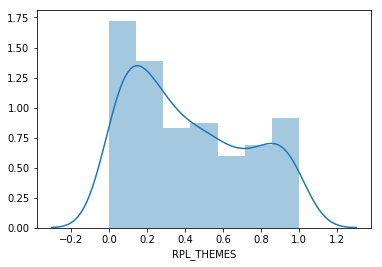

In [9]:
sns.distplot(pdx_svid['RPL_THEMES'].dropna())

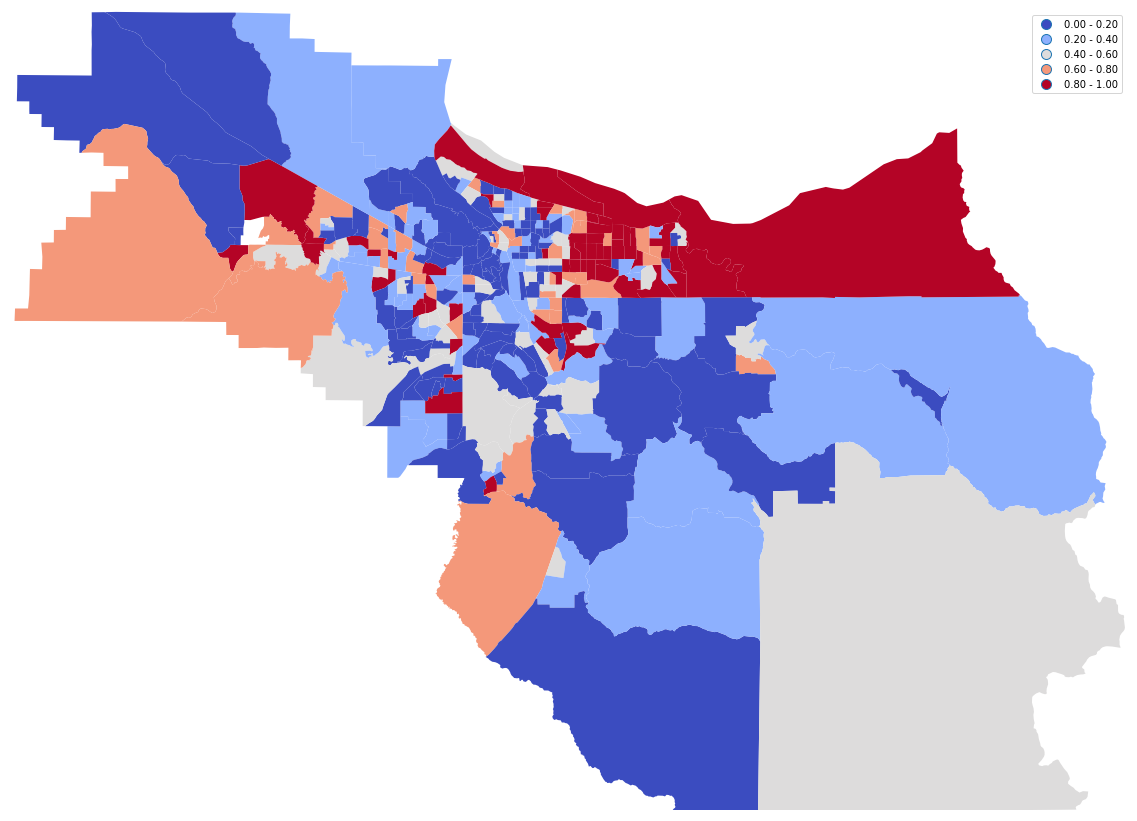

In [11]:
# plot RPL_THEMES accross PDX using geoplot

gplt.choropleth(pdx_svid,
                hue=pdx_svid['RPL_THEMES'].dropna(),  # Display data, passed as a Series
                projection=gcrs.AlbersEqualArea(),
                cmap='coolwarm',
                linewidth=0.5,
                #k=9,
                legend=True,
                scheme='equal_interval',
                figsize=(20, 20))